In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.feature_selection import f_classif

In [2]:
train = pd.read_csv('train.csv')

In [3]:
test = pd.read_csv('test.csv')

In [4]:
train.head()

CREDIT SCORE  FIRST PAYMENT DATE FIRST TIME HOMEBUYER FLAG  MATURITY DATE  \
0           781              201805                         N         203304   
1           731              201808                         Y         204807   
2           692              201803                         N         204802   
3           730              201807                         Y         204806   
4           651              201901                         Y         204812   

   NUMBER OF UNITS OCCUPANCY STATUS  ORIGINAL COMBINED LOAN-TO-VALUE (CLTV)  \
0                1                P                                      65   
1                1                P                                      95   
2                1                I                                      69   
3                1                P                                      75   
4                1                P                                      80   

   ORIGINAL DEBT-TO-INCOME (DTI) RATIO  ORIGINAL UPB  \
0                                   43        155000   
1                                   44        323000   
2                                   45        615000   
3                                   44        200000   
4                                   38        130000   

   ORIGINAL LOAN-TO-VALUE (LTV)  ORIGINAL INTEREST RATE PROPERTY TYPE  \
0                            65                   4.125            SF   
1                            95                   4.625            PU   
2                            69                   4.875            SF   
3                            75                   4.500            PU   
4                            80                   6.000            SF   

  LOAN SEQUENCE NUMBER LOAN PURPOSE  ORIGINAL LOAN TERM HARP INDICATOR  \
0         F18Q10281465            C                 180              N   
1         F18Q20333958            P                 360              N   
2         F18Q10017448            P                 360              N   
3         F18Q20164885            P                 360              N   
4         F18Q40182396            P                 360              N   

   CURRENT LOAN DELINQUENCY STATUS  DEFAULT  
0                                0        0  
1                                0        0  
2                               37        1  
3                                0        0  
4                                0        0

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 18 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   CREDIT SCORE                            200000 non-null  int64  
 1   FIRST PAYMENT DATE                      200000 non-null  int64  
 2   FIRST TIME HOMEBUYER FLAG               200000 non-null  object 
 3   MATURITY DATE                           200000 non-null  int64  
 4   NUMBER OF UNITS                         200000 non-null  int64  
 5   OCCUPANCY STATUS                        200000 non-null  object 
 6   ORIGINAL COMBINED LOAN-TO-VALUE (CLTV)  200000 non-null  int64  
 7   ORIGINAL DEBT-TO-INCOME (DTI) RATIO     200000 non-null  int64  
 8   ORIGINAL UPB                            200000 non-null  int64  
 9   ORIGINAL LOAN-TO-VALUE (LTV)            200000 non-null  int64  
 10  ORIGINAL INTEREST RATE                  2000

In [6]:
test.head()

CREDIT SCORE  FIRST PAYMENT DATE FIRST TIME HOMEBUYER FLAG  MATURITY DATE  \
0           777              201905                         Y         204904   
1           740              201910                         N         204909   
2           772              202001                         N         204912   
3           802              202001                         N         204912   
4           631              201903                         N         204902   

   NUMBER OF UNITS OCCUPANCY STATUS  ORIGINAL COMBINED LOAN-TO-VALUE (CLTV)  \
0                1                P                                      95   
1                1                P                                      75   
2                1                P                                      80   
3                1                P                                      68   
4                1                P                                      43   

   ORIGINAL DEBT-TO-INCOME (DTI) RATIO  ORIGINAL UPB  \
0                                   35        176000   
1                                   44        216000   
2                                   21        332000   
3                                   32        316000   
4                                   45        225000   

   ORIGINAL LOAN-TO-VALUE (LTV)  ORIGINAL INTEREST RATE PROPERTY TYPE  \
0                            95                   4.750            CO   
1                            75                   3.875            SF   
2                            80                   4.490            PU   
3                            68                   3.875            SF   
4                            43                   5.000            SF   

  LOAN SEQUENCE NUMBER LOAN PURPOSE  ORIGINAL LOAN TERM HARP INDICATOR  \
0         F19Q10274367            P                 360              N   
1         F19Q30187095            C                 360              N   
2         F19Q40255478            P                 360              N   
3         F19Q40409875            P                 360              N   
4         F19Q10020902            P                 360              N   

   CURRENT LOAN DELINQUENCY STATUS  DEFAULT  
0                                0        0  
1                                0        0  
2                                0        0  
3                                0        0  
4                                6        1

In [7]:
#merge the train and test data to do feature selection
frames = [train,test]
total = pd.concat(frames)


# Feature selection

In [8]:
# first divide training data into categorical and numerical subsets
X_train_cat = train.select_dtypes(include = 'object').copy()
X_train_num = train.select_dtypes(include = 'number').copy()

In [9]:
X_train_cat.head()

FIRST TIME HOMEBUYER FLAG OCCUPANCY STATUS PROPERTY TYPE  \
0                         N                P            SF   
1                         Y                P            PU   
2                         N                I            SF   
3                         Y                P            PU   
4                         Y                P            SF   

  LOAN SEQUENCE NUMBER LOAN PURPOSE HARP INDICATOR  
0         F18Q10281465            C              N  
1         F18Q20333958            P              N  
2         F18Q10017448            P              N  
3         F18Q20164885            P              N  
4         F18Q40182396            P              N

In [21]:
dt = train.pivot_table(columns='FIRST TIME HOMEBUYER FLAG',index='DEFAULT')

In [22]:
dt

CREDIT SCORE                          \
FIRST TIME HOMEBUYER FLAG            9           N           Y   
DEFAULT                                                          
0                                795.0  750.504789  743.645975   
1                                  NaN  714.159759  713.223244   

                          CURRENT LOAN DELINQUENCY STATUS             \
FIRST TIME HOMEBUYER FLAG                               9          N   
DEFAULT                                                                
0                                                     0.0   0.084329   
1                                                     NaN  49.266029   

                                     FIRST PAYMENT DATE                 \
FIRST TIME HOMEBUYER FLAG          Y                  9              N   
DEFAULT                                                                  
0                           0.079765           201804.0  201821.032411   
1                          54.524636                NaN  201820.057018   

                                         MATURITY DATE  ...  \
FIRST TIME HOMEBUYER FLAG              Y             9  ...   
DEFAULT                                                 ...   
0                          201821.030581      204803.0  ...   
1                          201820.629492           NaN  ...   

                          ORIGINAL INTEREST RATE ORIGINAL LOAN TERM  \
FIRST TIME HOMEBUYER FLAG                      Y                  9   
DEFAULT                                                               
0                                       4.734310              360.0   
1                                       4.909436                NaN   

                                                   \
FIRST TIME HOMEBUYER FLAG           N           Y   
DEFAULT                                             
0                          328.807097  350.730331   
1                          337.839146  355.603614   

                          ORIGINAL LOAN-TO-VALUE (LTV)                        \
FIRST TIME HOMEBUYER FLAG                            9          N          Y   
DEFAULT                                                                        
0                                                 80.0  72.268496  86.418190   
1                                                  NaN  75.045683  88.853604   

                          ORIGINAL UPB                                
FIRST TIME HOMEBUYER FLAG            9              N              Y  
DEFAULT                                                               
0                             124000.0  232183.948685  236951.052244  
1                                  NaN  239549.312624  237075.860981  

[2 rows x 33 columns]

In [24]:
pd.crosstab(train['DEFAULT'],train['FIRST TIME HOMEBUYER FLAG'])

FIRST TIME HOMEBUYER FLAG  9      N      Y
DEFAULT                                   
0                          1  91357  33975
1                          0  49318  25349

### Chi-squared statistic for categorical features

In [10]:
# define an empty dictionary to store chi-squared test results
chi2_check = {}

# loop over each column in the training set to calculate chi-statistic with the target variable
for column in X_train_cat:
    chi, p, dof, ex = chi2_contingency(pd.crosstab(train['DEFAULT'],X_train_cat[column]))
    chi2_check.setdefault('Feature',[]).append(column)
    chi2_check.setdefault('p-value',[]).append(round(p, 10))

# convert the dictionary to a DF
chi2_result = pd.DataFrame(data = chi2_check)
chi2_result.sort_values(by = ['p-value'], ascending = True, ignore_index = True, inplace = True)
chi2_result

KeyboardInterrupt: 

### ANOVA F-Statistic for numerical features

In [28]:
# since f_class_if does not accept missing values, we will do a very crude imputation of missing values
X_train_num.fillna(X_train_num.mean(), inplace = True)
# Calculate F Statistic and corresponding p values
F_statistic, p_values = f_classif(X_train_num, train['DEFAULT'])
# convert to a DF
ANOVA_F_table = pd.DataFrame(data = {'Numerical_Feature': X_train_num.columns.values, 'F-Score': F_statistic, 'p values': p_values.round(decimals=10)})
ANOVA_F_table.sort_values(by = ['F-Score'], ascending = False, ignore_index = True, inplace = True)
ANOVA_F_table

/afs/inf.ed.ac.uk/user/s21/s2163972/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


Numerical_Feature       F-Score      p values
0                                  DEFAULT           inf  0.000000e+00
1          CURRENT LOAN DELINQUENCY STATUS  8.665304e+04  0.000000e+00
2                             CREDIT SCORE  2.750677e+04  0.000000e+00
3      ORIGINAL DEBT-TO-INCOME (DTI) RATIO  7.735000e+03  0.000000e+00
4                   ORIGINAL INTEREST RATE  5.783261e+03  0.000000e+00
5   ORIGINAL COMBINED LOAN-TO-VALUE (CLTV)  2.385725e+03  0.000000e+00
6             ORIGINAL LOAN-TO-VALUE (LTV)  2.256400e+03  0.000000e+00
7                       ORIGINAL LOAN TERM  1.197775e+03  0.000000e+00
8                            MATURITY DATE  1.182235e+03  0.000000e+00
9                          NUMBER OF UNITS  2.962694e+02  0.000000e+00
10                            ORIGINAL UPB  8.284433e+01  0.000000e+00
11                      FIRST PAYMENT DATE  2.658196e+01  2.528000e-07

In [8]:
Xtrn = train.drop(columns='DEFAULT')

In [11]:
Xtrn.head()

CREDIT SCORE  FIRST PAYMENT DATE FIRST TIME HOMEBUYER FLAG  MATURITY DATE  \
0           781              201805                         N         203304   
1           731              201808                         Y         204807   
2           692              201803                         N         204802   
3           730              201807                         Y         204806   
4           651              201901                         Y         204812   

   NUMBER OF UNITS OCCUPANCY STATUS  ORIGINAL COMBINED LOAN-TO-VALUE (CLTV)  \
0                1                P                                      65   
1                1                P                                      95   
2                1                I                                      69   
3                1                P                                      75   
4                1                P                                      80   

   ORIGINAL DEBT-TO-INCOME (DTI) RATIO  ORIGINAL UPB  \
0                                   43        155000   
1                                   44        323000   
2                                   45        615000   
3                                   44        200000   
4                                   38        130000   

   ORIGINAL LOAN-TO-VALUE (LTV)  ORIGINAL INTEREST RATE PROPERTY TYPE  \
0                            65                   4.125            SF   
1                            95                   4.625            PU   
2                            69                   4.875            SF   
3                            75                   4.500            PU   
4                            80                   6.000            SF   

  LOAN SEQUENCE NUMBER LOAN PURPOSE  ORIGINAL LOAN TERM HARP INDICATOR  \
0         F18Q10281465            C                 180              N   
1         F18Q20333958            P                 360              N   
2         F18Q10017448            P                 360              N   
3         F18Q20164885            P                 360              N   
4         F18Q40182396            P                 360              N   

   CURRENT LOAN DELINQUENCY STATUS  
0                                0  
1                                0  
2                               37  
3                                0  
4                                0

In [11]:
Xtrn = train[['CREDIT SCORE','ORIGINAL DEBT-TO-INCOME (DTI) RATIO','ORIGINAL COMBINED LOAN-TO-VALUE (CLTV)',
                  'ORIGINAL INTEREST RATE','FIRST TIME HOMEBUYER FLAG','OCCUPANCY STATUS']]

In [12]:
Ytrn = train[['DEFAULT']]

In [13]:
Ytrn.head()

DEFAULT
0        0
1        0
2        1
3        0
4        0

In [14]:
Xtst = test[['CREDIT SCORE','ORIGINAL DEBT-TO-INCOME (DTI) RATIO','ORIGINAL COMBINED LOAN-TO-VALUE (CLTV)',
                  'ORIGINAL INTEREST RATE','FIRST TIME HOMEBUYER FLAG','OCCUPANCY STATUS']]

In [15]:
Ytst = test[['DEFAULT']]

In [16]:
Xtrn.describe()

CREDIT SCORE  ORIGINAL DEBT-TO-INCOME (DTI) RATIO  \
count  200000.000000                        200000.000000   
mean      735.652300                            37.044845   
std        48.414273                             9.097606   
min       578.000000                             1.000000   
25%       700.000000                            31.000000   
50%       740.000000                            39.000000   
75%       776.000000                            44.000000   
max       839.000000                            51.000000   

       ORIGINAL COMBINED LOAN-TO-VALUE (CLTV)  ORIGINAL INTEREST RATE  
count                           200000.000000           200000.000000  
mean                                77.729770                4.794887  
std                                 16.608327                0.480962  
min                                  4.000000                2.500000  
25%                                 70.000000                4.500000  
50%                                 80.000000                4.750000  
75%                                 90.000000                5.125000  
max                                105.000000                6.875000

In [17]:
Xtrn.head()

CREDIT SCORE  ORIGINAL DEBT-TO-INCOME (DTI) RATIO  \
0           781                                   43   
1           731                                   44   
2           692                                   45   
3           730                                   44   
4           651                                   38   

   ORIGINAL COMBINED LOAN-TO-VALUE (CLTV)  ORIGINAL INTEREST RATE  \
0                                      65                   4.125   
1                                      95                   4.625   
2                                      69                   4.875   
3                                      75                   4.500   
4                                      80                   6.000   

  FIRST TIME HOMEBUYER FLAG OCCUPANCY STATUS  
0                         N                P  
1                         Y                P  
2                         N                I  
3                         Y                P  
4                         Y                P

In [18]:
Xtrn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 6 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   CREDIT SCORE                            200000 non-null  int64  
 1   ORIGINAL DEBT-TO-INCOME (DTI) RATIO     200000 non-null  int64  
 2   ORIGINAL COMBINED LOAN-TO-VALUE (CLTV)  200000 non-null  int64  
 3   ORIGINAL INTEREST RATE                  200000 non-null  float64
 4   FIRST TIME HOMEBUYER FLAG               200000 non-null  object 
 5   OCCUPANCY STATUS                        200000 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ MB


In [19]:
Xtrn['FIRST TIME HOMEBUYER FLAG'].replace('N','0',inplace=True)

/afs/inf.ed.ac.uk/user/s21/s2163972/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [20]:
Xtrn['FIRST TIME HOMEBUYER FLAG'].replace('Y','1',inplace=True)

In [21]:
Xtrn['FIRST TIME HOMEBUYER FLAG'] = pd.to_numeric(Xtrn['FIRST TIME HOMEBUYER FLAG'])

/tmp/ipykernel_2291472/1337331480.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrn['FIRST TIME HOMEBUYER FLAG'] = pd.to_numeric(Xtrn['FIRST TIME HOMEBUYER FLAG'])


In [22]:
Xtrn.head()

CREDIT SCORE  ORIGINAL DEBT-TO-INCOME (DTI) RATIO  \
0           781                                   43   
1           731                                   44   
2           692                                   45   
3           730                                   44   
4           651                                   38   

   ORIGINAL COMBINED LOAN-TO-VALUE (CLTV)  ORIGINAL INTEREST RATE  \
0                                      65                   4.125   
1                                      95                   4.625   
2                                      69                   4.875   
3                                      75                   4.500   
4                                      80                   6.000   

   FIRST TIME HOMEBUYER FLAG OCCUPANCY STATUS  
0                          0                P  
1                          1                P  
2                          0                I  
3                          1                P  
4                          1                P

In [23]:
Xtst['FIRST TIME HOMEBUYER FLAG'].replace('N','0',inplace=True)
Xtst['FIRST TIME HOMEBUYER FLAG'].replace('Y','1',inplace=True)
Xtst['FIRST TIME HOMEBUYER FLAG'] = pd.to_numeric(Xtst['FIRST TIME HOMEBUYER FLAG'])

/afs/inf.ed.ac.uk/user/s21/s2163972/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
/tmp/ipykernel_2291472/4234728013.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtst['FIRST TIME HOMEBUYER FLAG'] = pd.to_numeric(Xtst['FIRST TIME HOMEBUYER FLAG'])


In [24]:
Xtst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 6 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   CREDIT SCORE                            200000 non-null  int64  
 1   ORIGINAL DEBT-TO-INCOME (DTI) RATIO     200000 non-null  int64  
 2   ORIGINAL COMBINED LOAN-TO-VALUE (CLTV)  200000 non-null  int64  
 3   ORIGINAL INTEREST RATE                  200000 non-null  float64
 4   FIRST TIME HOMEBUYER FLAG               200000 non-null  int64  
 5   OCCUPANCY STATUS                        200000 non-null  object 
dtypes: float64(1), int64(4), object(1)
memory usage: 9.2+ MB


In [25]:
#convert OCCUPANCY STATUS to number
Xtrn['OCCUPANCY STATUS'].replace('P','0',inplace=True)
Xtrn['OCCUPANCY STATUS'].replace('I','1',inplace=True)
Xtrn['OCCUPANCY STATUS'].replace('S','1',inplace=True)
Xtrn['OCCUPANCY STATUS'] = pd.to_numeric(Xtrn['OCCUPANCY STATUS'])

/tmp/ipykernel_2291472/243298853.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrn['OCCUPANCY STATUS'] = pd.to_numeric(Xtrn['OCCUPANCY STATUS'])


In [26]:
Xtst['OCCUPANCY STATUS'].replace('P','0',inplace=True)
Xtst['OCCUPANCY STATUS'].replace('I','1',inplace=True)
Xtst['OCCUPANCY STATUS'].replace('S','1',inplace=True)
Xtst['OCCUPANCY STATUS'] = pd.to_numeric(Xtst['OCCUPANCY STATUS'])

/tmp/ipykernel_2291472/3846658856.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtst['OCCUPANCY STATUS'] = pd.to_numeric(Xtst['OCCUPANCY STATUS'])


In [27]:
Xtrn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 6 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   CREDIT SCORE                            200000 non-null  int64  
 1   ORIGINAL DEBT-TO-INCOME (DTI) RATIO     200000 non-null  int64  
 2   ORIGINAL COMBINED LOAN-TO-VALUE (CLTV)  200000 non-null  int64  
 3   ORIGINAL INTEREST RATE                  200000 non-null  float64
 4   FIRST TIME HOMEBUYER FLAG               200000 non-null  int64  
 5   OCCUPANCY STATUS                        200000 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 9.2 MB


In [28]:
Xtst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 6 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   CREDIT SCORE                            200000 non-null  int64  
 1   ORIGINAL DEBT-TO-INCOME (DTI) RATIO     200000 non-null  int64  
 2   ORIGINAL COMBINED LOAN-TO-VALUE (CLTV)  200000 non-null  int64  
 3   ORIGINAL INTEREST RATE                  200000 non-null  float64
 4   FIRST TIME HOMEBUYER FLAG               200000 non-null  int64  
 5   OCCUPANCY STATUS                        200000 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 9.2 MB


In [55]:
#build the model
lr = LogisticRegression()
lr.fit(Xtrn,Ytrn)

/afs/inf.ed.ac.uk/user/s21/s2163972/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [56]:
y_pred = lr.predict(Xtst)

In [57]:
probas = lr.predict_proba(Xtst)[:, 1]

In [58]:
#precision
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("accuracy score:"+str(accuracy_score(Ytst, y_pred)))
print("precision score:"+str(precision_score(Ytst, y_pred, average='macro')))  # 0.2222222222222222
print("recall:"+str(recall_score(Ytst, y_pred, average='macro')))
print("f1-score:"+str(f1_score(Ytst, y_pred, average='macro')))

accuracy score:0.618295
precision score:0.6545790532952367
recall:0.6040728219701927
f1-score:0.5771794815403565


In [59]:
def get_preds(threshold, probabilities):
    return [1 if prob > threshold else 0 for prob in probabilities]

In [60]:
roc_values = []
for thresh in np.linspace(0, 1, 100):
    preds = get_preds(thresh, probas)
    tn, fp, fn, tp = confusion_matrix(Ytst, preds).ravel()
    tpr = tp/(tp+fn)
    fpr = fp/(fp+tn)
    roc_values.append([tpr, fpr])
tpr_values, fpr_values = zip(*roc_values)

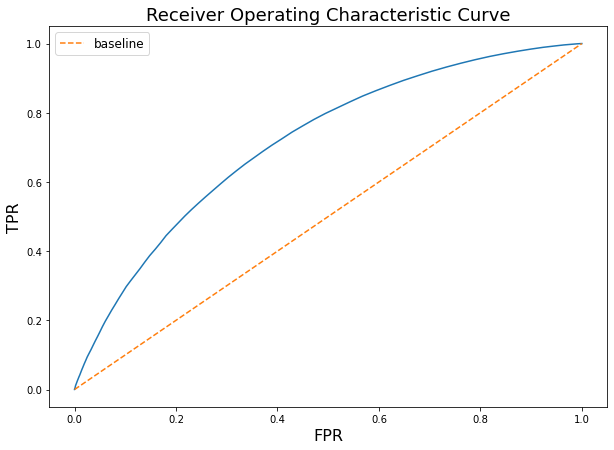

In [61]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(fpr_values, tpr_values)
ax.plot(np.linspace(0, 1, 100),
         np.linspace(0, 1, 100),
         label='baseline',
         linestyle='--')
plt.title('Receiver Operating Characteristic Curve', fontsize=18)
plt.ylabel('TPR', fontsize=16)
plt.xlabel('FPR', fontsize=16)
plt.legend(fontsize=12)

[0.00000000e+00 9.51873287e-06 9.51873287e-06 ... 9.99819144e-01
 9.99819144e-01 1.00000000e+00]
[0.00000000e+00 0.00000000e+00 4.21300977e-05 ... 9.99989467e-01
 1.00000000e+00 1.00000000e+00]
[ 3.21474446  2.21474446  1.99054963 ... -3.93556956 -3.93574757
 -4.26662494]


<Figure size 432x288 with 0 Axes>

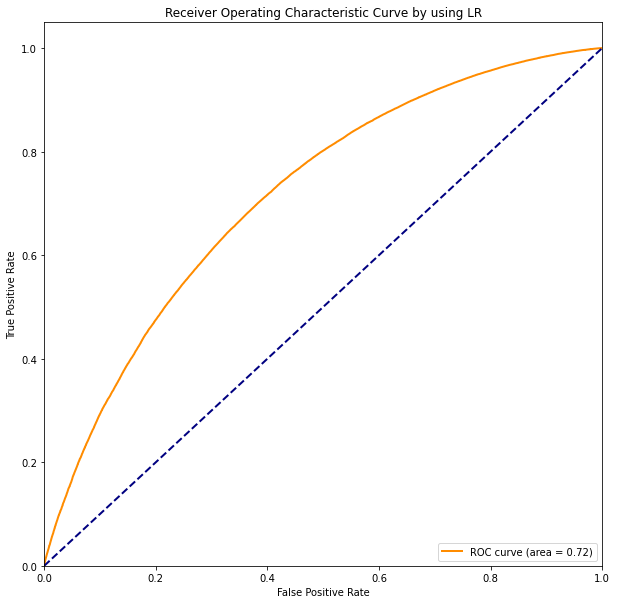

In [72]:
predict_label = lr.decision_function(Xtst)

fpr,tpr,threshold = roc_curve(Ytst, predict_label) ###计算真正率和假正率
print(fpr)
print(tpr)
print(threshold)
roc_auc = auc(fpr,tpr)

plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve by using LR')
plt.legend(loc="lower right")
plt.show()


In [63]:
#confusion matrix
tn, fp, fn, tp = confusion_matrix(Ytst, y_pred).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

True Positives: 30646
False Positives: 12043
True Negatives: 93013
False Negatives: 64298


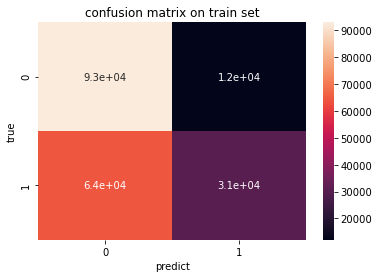

In [64]:
#plot the confusion matrix
C = confusion_matrix(Ytst, y_pred)
sns.heatmap(C,annot=True)
plt.title('confusion matrix on train set') 
plt.xlabel('predict') 
plt.ylabel('true') 
plt.show()

### using a non-linear regression model to compare  

In [65]:
from sklearn.svm import SVC

In [66]:
clf = SVC(kernel = 'poly',probability=True)

In [67]:
clf.fit(Xtrn,Ytrn)

/afs/inf.ed.ac.uk/user/s21/s2163972/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(kernel='poly', probability=True)

In [68]:
y_pred_svm = clf.predict(Xtst)
probas = clf.predict_proba(Xtst)[:, 1]

In [51]:
#precision
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("accuracy score:"+str(accuracy_score(Ytst, y_pred_svm)))
print("precision score:"+str(precision_score(Ytst, y_pred_svm, average='macro')))  # 0.2222222222222222
print("recall:"+str(recall_score(Ytst, y_pred_svm, average='macro')))
print("f1-score:"+str(f1_score(Ytst, y_pred_svm, average='macro')))


accuracy score:0.63614
precision score:0.6515874780720298
recall:0.6260134001686333
f1-score:0.6154528379589225


In [48]:
#confusion matrix
tn, fp, fn, tp = confusion_matrix(Ytst, y_pred_svm).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

True Positives: 40420
False Positives: 18248
True Negatives: 86808
False Negatives: 54524


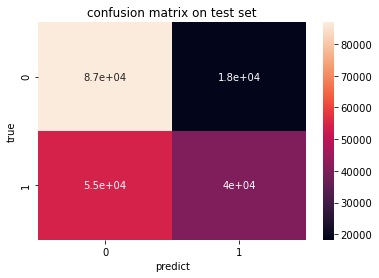

In [50]:
#plot the confusion matrix
C = confusion_matrix(Ytst, y_pred_svm)
sns.heatmap(C,annot=True)
plt.title('confusion matrix on test set') 
plt.xlabel('predict') 
plt.ylabel('true') 
plt.show()

In [69]:
#svm ROC
from sklearn.metrics import roc_curve, auc 

test_predict_label = clf.decision_function(Xtst)

In [70]:
fpr,tpr,threshold = roc_curve(Ytst, test_predict_label) ###计算真正率和假正率
print(fpr)
print(tpr)
print(threshold)
roc_auc = auc(fpr,tpr)

[0.00000000e+00 9.51873287e-06 9.51873287e-06 ... 9.99904813e-01
 9.99904813e-01 1.00000000e+00]
[0.00000000e+00 0.00000000e+00 5.26626222e-05 ... 9.99989467e-01
 1.00000000e+00 1.00000000e+00]
[ 2.69068307  1.69068307  1.61833822 ... -3.63677177 -3.64042276
 -3.87311584]


In [71]:

plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve by using SVM')
plt.legend(loc="lower right")
plt.show()


<Figure size 432x288 with 0 Axes>